# Sales of Riding Mowers: Scatter Plots & Classification

This notebook analyzes the RidingMowers dataset to:
- Create scatter plots
- Visualize ownership patterns
- Build a logistic regression classifier


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

sns.set(style='whitegrid')

In [4]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/TABxSAID/Datasets/refs/heads/master/RidingMowers.csv')

# Display first few rows
df.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


In [5]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     24 non-null     float64
 1   Lot_Size   24 non-null     float64
 2   Ownership  24 non-null     object 
dtypes: float64(2), object(1)
memory usage: 708.0+ bytes


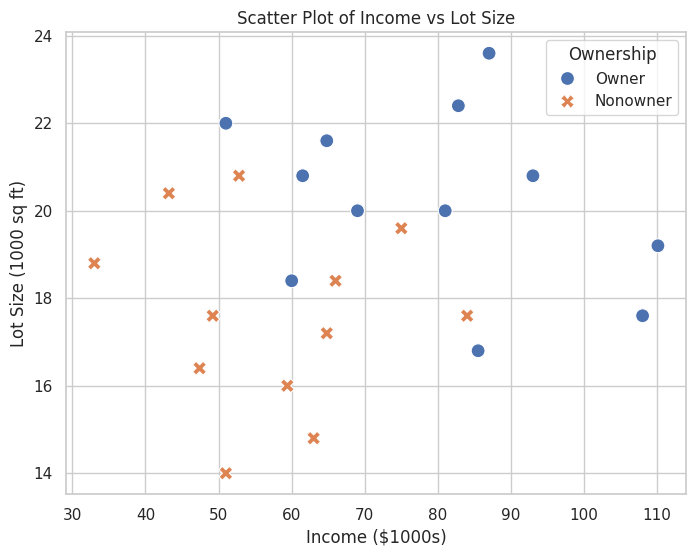

In [6]:
# Scatter Plot
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df,
    x='Income',
    y='Lot_Size',
    hue='Ownership',
    style='Ownership',
    s=100
)

plt.title('Scatter Plot of Income vs Lot Size')
plt.xlabel('Income ($1000s)')
plt.ylabel('Lot Size (1000 sq ft)')
plt.show()

In [7]:
# Convert Ownership to binary
df['Ownership'] = df['Ownership'].map({'Nonowner': 0, 'Owner': 1})

# Define features and target
X = df[['Income', 'Lot_Size']]
y = df['Ownership']

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[3 0]
 [2 3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.60      0.75         5

    accuracy                           0.75         8
   macro avg       0.80      0.80      0.75         8
weighted avg       0.85      0.75      0.75         8



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


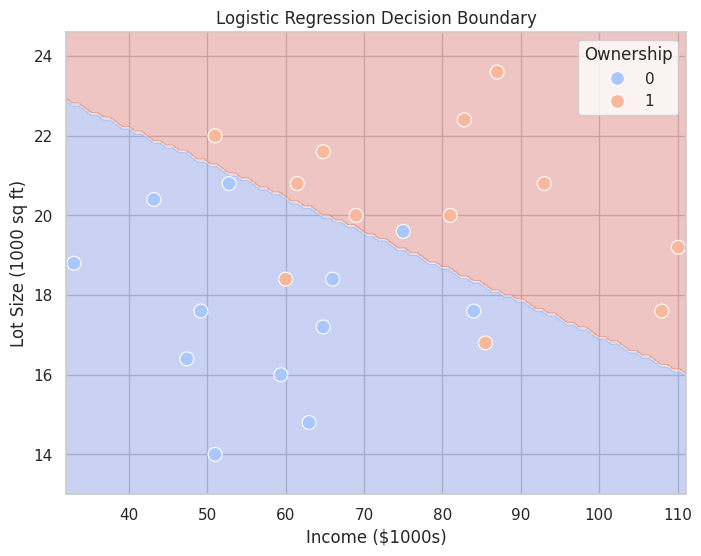

In [9]:
# Plot Decision Boundary
x_min, x_max = X['Income'].min() - 1, X['Income'].max() + 1
y_min, y_max = X['Lot_Size'].min() - 1, X['Lot_Size'].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

sns.scatterplot(
    x='Income',
    y='Lot_Size',
    hue=df['Ownership'],
    data=df,
    palette='coolwarm',
    s=100
)

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Income ($1000s)')
plt.ylabel('Lot Size (1000 sq ft)')
plt.show()